In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic= pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic=titanic[['Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare']]

In [6]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mode()[0])
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
titanic['Sex']= labelencoder.fit_transform(titanic['Sex'])

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
x= titanic.drop(columns='Survived')
y= titanic['Survived']

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=0)

In [15]:
## Applying Logistic Regression 
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
lr.score(xtrain,ytrain)

0.7963483146067416

In [16]:
## Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [17]:
from sklearn import tree
names=list(x.columns)
cnames=list(ytrain.unique())

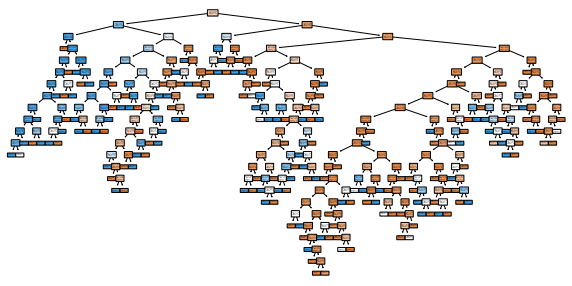

In [18]:
fig=plt.figure(figsize=(10,5))
tree.plot_tree(dt,filled=True, precision=4, rounded=True)
plt.show()

In [19]:
dt.score(xtrain,ytrain)

0.9803370786516854

In [20]:
dt.score(xtest,ytest)

0.7932960893854749

[[95 15]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



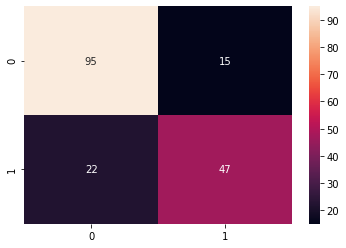

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
from sklearn.metrics import classification_report 
print(classification_report(ytest,ypred))

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_transform = scalar.fit_transform(x)

In [23]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,42,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random']
    
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [25]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'splitter': 'random'}

In [26]:
grid_search.best_score_

0.8300502314586822

In [27]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth =8, min_samples_leaf= 1, min_samples_split= 9, splitter ='random')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [28]:
dt.score(xtrain,ytrain)

0.8497191011235955

In [29]:
dt.score(xtest,ytest)

0.7988826815642458

In [30]:
fnames=list(x.columns)
class_name= list(ytrain.unique())

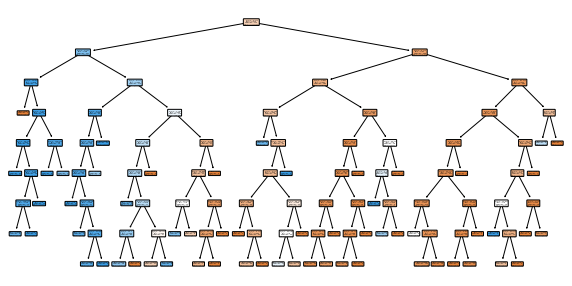

In [31]:
fig=plt.figure(figsize=(10,5))
tree.plot_tree(dt,filled=True,rounded=True)
plt.show()